In [ ]:
!pip install pycaret[full]

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/df_clean.csv?token=AL27OTJGKQIMLPEON2SNZD3A6ARQW')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,STORIES,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,SOURCE,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1972,3.0,1095000.0,Q,1,2522.0,1,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,Residential,20009.0,38.914680,-77.040832,Old City 2,4201.0,004201 2006,Ward 2,152,NW
1,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,1984,3.0,2100000.0,Q,3,2522.0,1,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,Residential,20009.0,38.914684,-77.040678,Old City 2,4201.0,004201 2006,Ward 2,152,NW
2,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,1984,3.0,1602000.0,Q,1,2484.0,1,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,Residential,20009.0,38.914683,-77.040629,Old City 2,4201.0,004201 2006,Ward 2,152,NW
3,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,1972,4.0,1950000.0,Q,1,5344.0,1,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,1.0,4,11,2196,Residential,20009.0,38.914331,-77.039715,Old City 2,4201.0,004201 2006,Ward 2,152,NW
4,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,1972,3.0,1050000.0,Q,1,2401.0,1,Row Inside,Very Good,Average,Common Brick,Metal- Sms,Hardwood,2.0,1,24,1627,Residential,20009.0,38.915408,-77.040129,Old City 2,4201.0,004201 2005,Ward 2,152,NW


In [5]:
from pycaret.regression import *
reg1 = setup(df, target = 'PRICE', session_id=42, log_experiment=True, 
             experiment_name='price_modeling', use_gpu = True,
             categorical_features = ['ZIPCODE'],
             numeric_features = ['BATHRM', 'HF_BATHRM', 'BEDRM', 'SALE_NUM', 'FIREPLACES', 'USECODE'])

,Description,Value
0,session_id,42
1,Target,PRICE
2,Original Data,"(57345, 35)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,16
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(40141, 3930)"


In [6]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,135247.9631,8.060230e+10,282233.0468,0.7768,0.4616,4.6522,27.290
lightgbm,Light Gradient Boosting Machine,136993.8506,8.321980e+10,286838.0680,0.7692,0.4664,4.7786,4.426
et,Extra Trees Regressor,132103.9102,8.981125e+10,297940.8450,0.7532,0.4605,4.4402,571.834
rf,Random Forest Regressor,132952.0741,9.091479e+10,299730.1846,0.7504,0.4574,5.3534,387.186
gbr,Gradient Boosting Regressor,149235.8081,9.282317e+10,303007.3095,0.7444,0.4881,6.9223,174.186
br,Bayesian Ridge,180808.7375,1.122814e+11,334130.3869,0.6887,0.6828,7.0283,322.746
ridge,Ridge Regression,184026.6375,1.158716e+11,339650.8562,0.6776,0.6852,6.4205,10.572
llar,Lasso Least Angle Regression,182196.2542,1.214819e+11,346795.2980,0.6656,0.6806,7.6945,11.344
lar,Least Angle Regression,185593.1078,1.210610e+11,346955.4018,0.6635,0.6977,7.6956,12.098
omp,Orthogonal Matching Pursuit,184613.7639,1.218062e+11,348195.9705,0.6614,0.6942,7.9281,9.706


In [7]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,138040.7731,7.521932e+10,274261.4124,0.7581,0.4551,0.5890
1,133124.4916,7.651028e+10,276604.9233,0.7373,0.4601,0.5917
2,130025.4118,5.402071e+10,232423.5639,0.8156,0.4719,37.3211
3,131881.2499,5.668918e+10,238094.9017,0.7916,0.4629,4.7026
4,143615.4787,1.688736e+11,410942.3664,0.7034,0.4408,0.4060
5,138876.3589,5.913999e+10,243187.1416,0.8034,0.4785,0.9231
6,135489.9060,6.788297e+10,260543.6137,0.8138,0.4465,1.0486
7,138282.4689,1.067865e+11,326782.1060,0.7803,0.4620,1.1872
8,136474.6548,6.288351e+10,250765.8527,0.8185,0.4854,4.4416
9,139226.0258,9.282980e+10,304679.8349,0.7619,0.4851,5.0226


In [8]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'MAE', search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,131659.7154,6.467229e+10,254307.4690,0.7920,0.4553,0.5811
1,127472.8120,7.872404e+10,280578.0507,0.7297,0.4490,0.5910
2,124040.1662,5.241078e+10,228934.0029,0.8211,0.4673,33.7480
3,127122.9765,5.525604e+10,235066.0251,0.7968,0.4645,4.9002
4,139444.0278,1.642999e+11,405339.2199,0.7114,0.4326,0.3927
5,131170.0792,5.424878e+10,232913.6827,0.8197,0.4681,0.9361
6,131297.6749,6.386374e+10,252712.7716,0.8248,0.4391,0.9884
7,130946.5458,9.092316e+10,301534.6758,0.8129,0.4554,1.0404
8,131955.0099,5.893638e+10,242768.1573,0.8299,0.4791,4.5321
9,133208.1371,8.740782e+10,295648.1438,0.7758,0.4801,4.2138


In [9]:
tuned_lightgbm

LGBMRegressor(bagging_fraction=0.6274298173596514, bagging_freq=5,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.6347474661539554, importance_type='split',
              learning_rate=0.03666569409336927, max_depth=-1,
              min_child_samples=15, min_child_weight=0.001,
              min_split_gain=0.6702337863652381, n_estimators=267, n_jobs=-1,
              num_leaves=110, objective=None, random_state=42,
              reg_alpha=5.455943134437243e-06, reg_lambda=7.834159286024462e-07,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

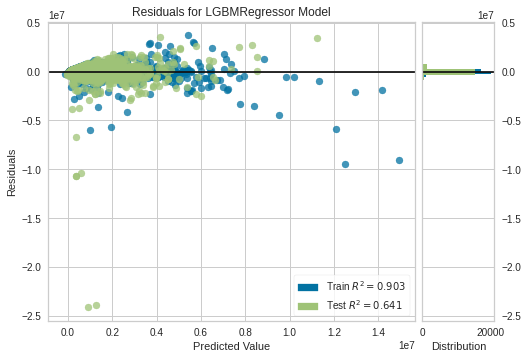

In [10]:
plot_model(tuned_lightgbm)

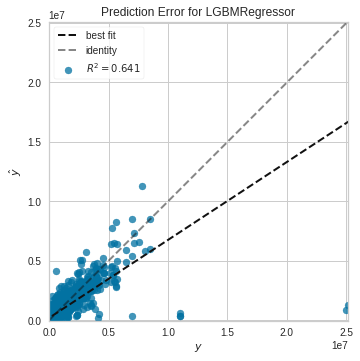

In [11]:
plot_model(tuned_lightgbm, plot = 'error')

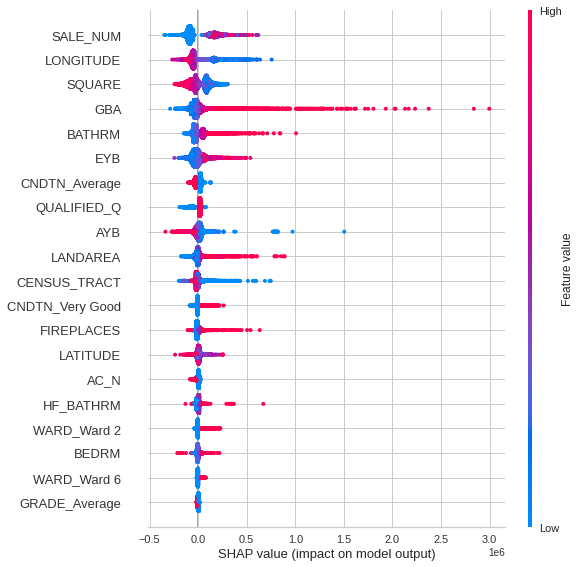

In [12]:
interpret_model(tuned_lightgbm)

In [13]:
save_model(tuned_lightgbm, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['ZIPCODE'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['BATHRM', 'HF_BATHRM',
                                                           'BEDRM', 'SALE_NUM',
                                                           'FIREPLACES',
                                                           'USECODE'],
                                       target='PRICE', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 f...
                                importance_type='split',
                                learning_rate=0.03666569409336927, max_depth=-1,
                                min_child_samples=15, min_chi